## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [9]:
%matplotlib inline
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')


# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [10]:
# TODO: Calculate number of students
n_students = len(student_data)

# TODO: Calculate number of features
n_features = len(student_data.columns)

# TODO: Calculate passing students
n_passed = len(student_data[student_data['passed'] == 'yes'])

# TODO: Calculate failing students
n_failed = len(student_data[student_data['passed'] == 'no'])

# TODO: Calculate graduation rate
grad_rate = float(n_passed) / (n_passed + n_failed)

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 31
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 0.67%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [11]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()
print y_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [17]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)
    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
y_all = y_all.replace(to_replace='yes', value=1)
y_all = y_all.replace(to_replace='no', value=0)
student_data = preprocess_features(student_data)
print student_data
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

     school_GP  school_MS  sex_F  sex_M  age  address_R  address_U  \
0            1          0      1      0   18          0          1   
1            1          0      1      0   17          0          1   
2            1          0      1      0   15          0          1   
3            1          0      1      0   15          0          1   
4            1          0      1      0   16          0          1   
5            1          0      0      1   16          0          1   
6            1          0      0      1   16          0          1   
7            1          0      1      0   17          0          1   
8            1          0      0      1   15          0          1   
9            1          0      0      1   15          0          1   
10           1          0      1      0   15          0          1   
11           1          0      1      0   15          0          1   
12           1          0      0      1   15          0          1   
13           1      

### Scatter Plot for features

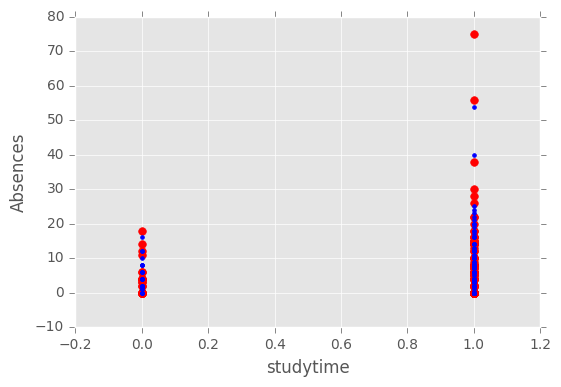

In [34]:
fig, ax = plt.subplots()

# Slice the original DataFrame using boolean indexing
df0 = student_data[student_data['passed']==0]
df1 = student_data[student_data['passed']==1]

failed     = ax.scatter(x=df0['internet'], y=df0['absences'],\
                      s=30, marker = 'o', edgecolor='r', facecolor='r')
passed     = ax.scatter(x=df1['internet'], y=df1['absences'],\
                      s=30, marker = '.', edgecolor='b', facecolor='b')
xlabel = ax.set_xlabel('studytime')
ylabel = ax.set_ylabel('Absences')

# legend = ax.legend((failed, passed),('failed', 'passed'),\
#               loc='center left', bbox_to_anchor=(1.0, 0.5))



### Bar Plots

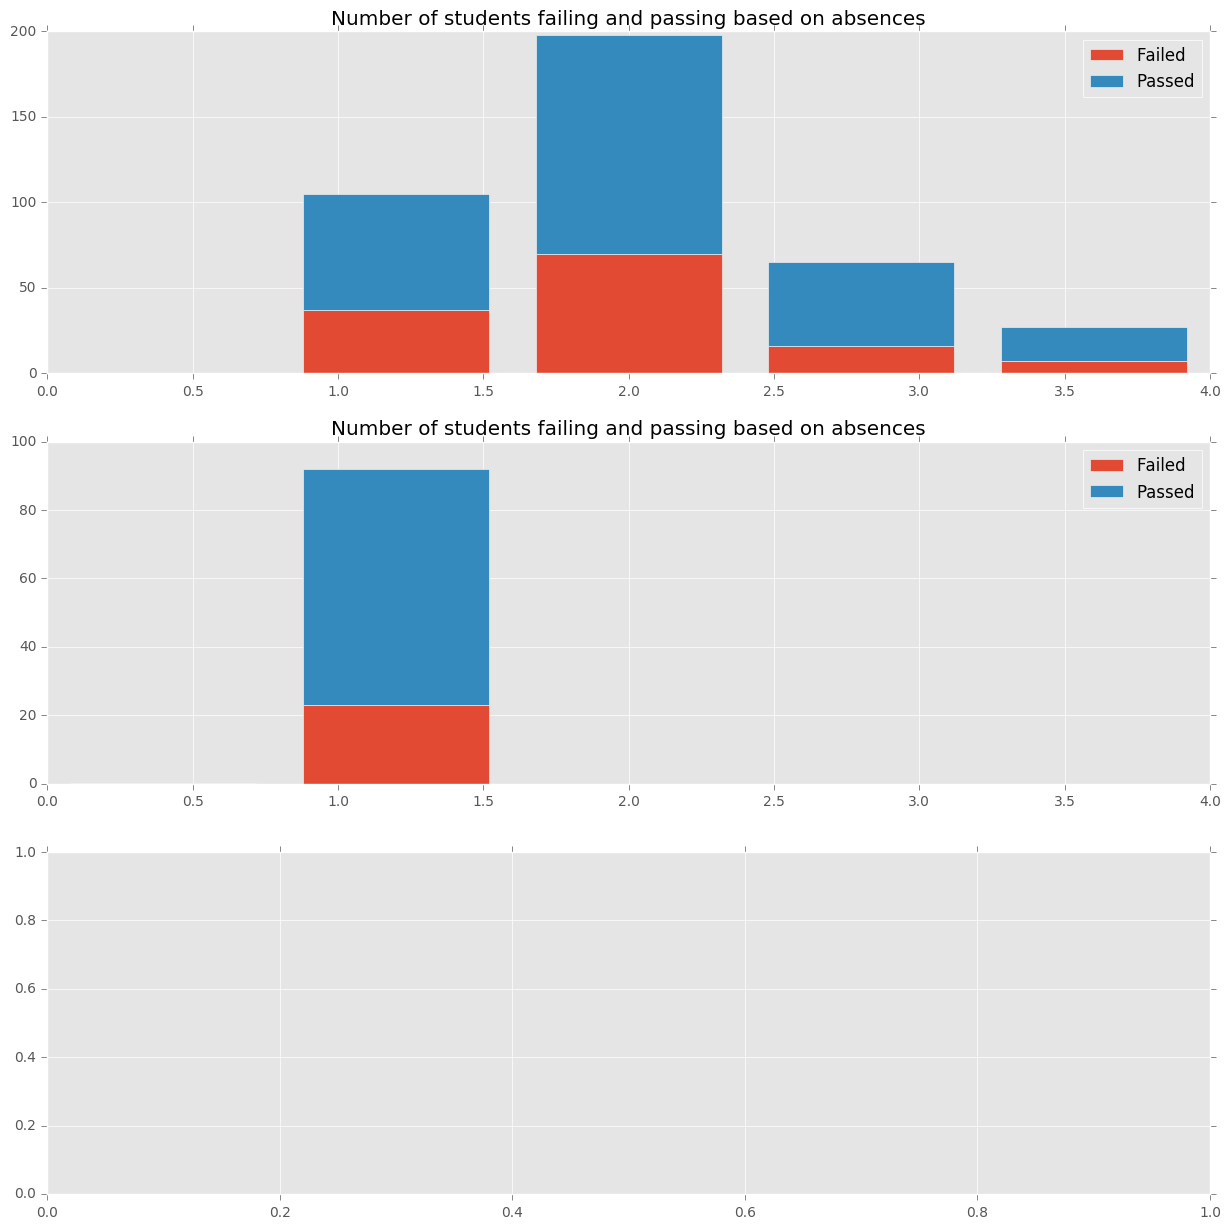

In [95]:
figsize_with_subplots = (15, 15)
# fig = plt.figure(figsize=figsize_with_subplots)
# fig_dims = (2, 2)
# plt.subplot2grid(fig_dims, (0, 0))

fig, ax = plt.subplots(3, 1, figsize=figsize_with_subplots)

student_data_temp = student_data[student_data['studytime'] > 2]

temp1 = 'studytime'
temp2 = 'higher'
studytimes = np.sort(student_data[temp1].unique())
max_studytime = max(studytimes)
df0 = student_data[student_data['passed'] == 0][temp1]
df1 = student_data[student_data['passed'] == 1][temp1]
df00 = student_data_temp[student_data_temp['passed'] == 0][temp2]
df01 = student_data_temp[student_data_temp['passed'] == 1][temp2]
ax[0].hist([df0, df1], 
         bins=max_studytime + 1, 
         range=(0, max_studytime), 
         stacked=True)
ax[0].legend(('Failed', 'Passed'), loc='best')
ax[0].set_title('Number of students failing and passing based on absences')
ax[1].hist([df00, df01], 
         bins=max_studytime + 1, 
         range=(0, max_studytime), 
         stacked=True)
ax[1].legend(('Failed', 'Passed'), loc='best')
ax[1].set_title('Number of students failing and passing based on absences')
# student_data['passed'].value_counts().plot(kind='bar', 
#                                             title='No. of Students passing and failing')

### Normalised Plots

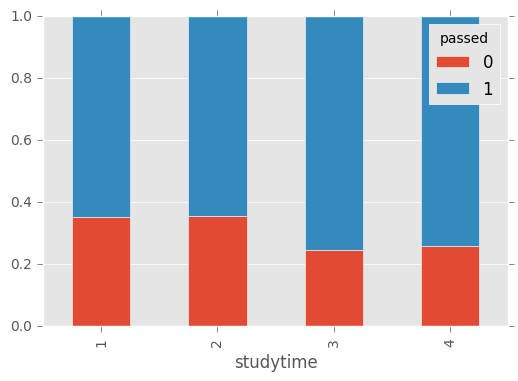

In [99]:
col_name1 = 'studytime'
col_name2 = 'passed'

df00 = student_data[col_name1]
df01 = student_data[col_name2]
df = pd.crosstab(df00, df01)

df_norm = df.div(df.sum(1).astype(float), axis=0)
df_norm.plot(kind='bar', 
                   stacked=True,
                   title='')